In [346]:
# import statements
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [347]:
# create dataframe from csv file
df = pd.read_csv('cancer patient data sets.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [349]:
# change 1s and 2s to male and female
df['Gender'] = df['Gender'].apply(lambda x: 'male' if x == 1 else 'female')

# order the dataframe by patient ids
df['Patient Id'] = df['Patient Id'].apply(lambda x: int(x[1:]))
df = df.sort_values(by=['Patient Id'], ascending=True)
df['Patient Id'] = df['Patient Id'].apply(lambda x: f'P{x}')

# fix index values
df.reset_index(drop=True, inplace=True)
df['index'] = df.index
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,male,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P2,25,female,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
2,2,P3,35,male,4,5,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
3,3,P4,27,male,2,3,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium
4,4,P5,48,male,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P996,37,female,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
996,996,P997,25,female,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
997,997,P998,18,female,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
998,998,P999,47,male,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


In [350]:
# make column names lowercase
df.rename(columns=str.lower, inplace=True)

# replaces all spaces with _
df.rename(columns={c: c.replace(' ', '_') for c in df.columns}, inplace=True)

# rename level column 
df.rename(columns={'level': 'severity_of_cancer'}, inplace=True)

df

,index,patient_id,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,severity_of_cancer
0,0,P1,33,male,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P2,25,female,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
2,2,P3,35,male,4,5,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
3,3,P4,27,male,2,3,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium
4,4,P5,48,male,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P996,37,female,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
996,996,P997,25,female,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
997,997,P998,18,female,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
998,998,P999,47,male,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


Hypothesis Test

Ho: Smoking does not have an effect on the severity of cancer
Ha: Smoking does have an effect on the severity of cancer

In [351]:
ct = pd.crosstab(df['smoking'], df['severity_of_cancer'])
ct

severity_of_cancer,High,Low,Medium
smoking,,,
1,0,61,120
2,70,81,71
3,0,71,101
4,19,40,0
5,0,0,10
6,10,30,20
7,187,20,0
8,79,0,10


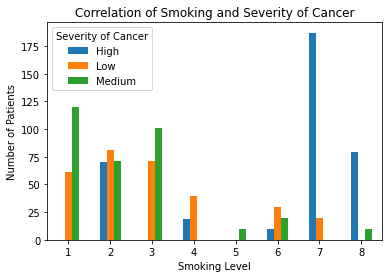

In [352]:
ct.plot(kind='bar')
plt.xlabel("Smoking Level")
plt.ylabel("Number of Patients")
plt.title("Correlation of Smoking and Severity of Cancer")

plt.legend(title="Severity of Cancer")
plt.xticks(rotation=0)
plt.show()

In [353]:
tstat, pval, dof, efreq = stats.chi2_contingency(ct)
print(pval)

5.246169667913276e-137


With a p-value of 5.25e-137, we can reject the null hypothesis since the p-value is less than alpha, 0.05. Since the p-value is very small, we can say that there is a strong relationship between smoking and lung cancer.

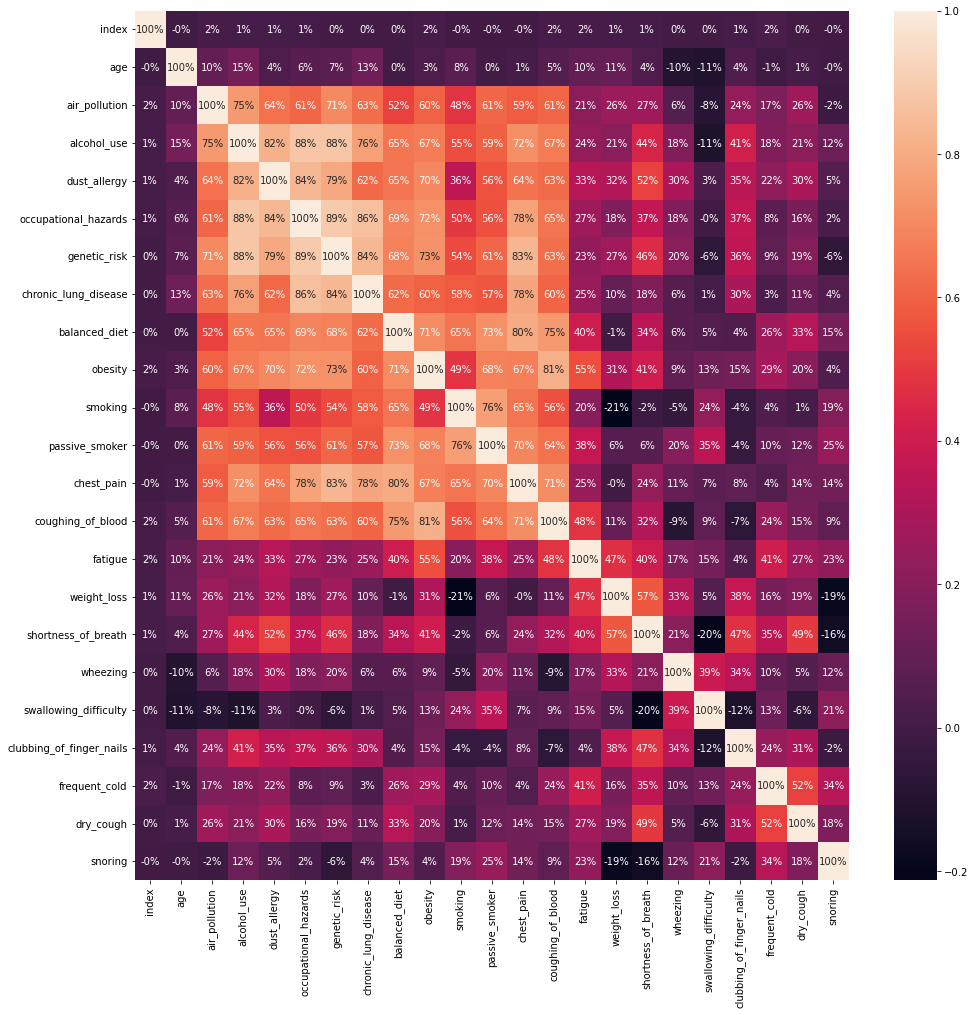

In [354]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot=True,fmt=".0%")
plt.show()

In [386]:
# df.groupby(['smoking', 'air_pollution', 'chronic_lung_disease', 'severity_of_cancer']).size().unstack().fillna(0).plot(kind='barh', figsize=(20,15))

In [390]:
ct1 = pd.crosstab(df[(df['air_pollution'].isin([1, 2, 3, 4, 5])) &
                    #  (df['alcohol_use'].isin([1, 2, 3, 4, 5])) &
                     (df['occupational_hazards'].isin([1, 2, 3, 4, 5])) &
                     (df['genetic_risk'].isin([1, 2, 3, 4]))
                    #  (df['chronic_lung_disease'].isin([1, 2, 3, 4])) &
                    #  (df['passive_smoker'].isin([1, 2, 3, 4, 5])) &
                    #  (df['balanced_diet'].isin([4, 5, 6, 7])) &
                    #  (df['chest_pain'].isin([1, 2, 3, 4, 5, 6])) &
                    #  (df['coughing_of_blood'].isin([1, 2, 3, 4, 5]))
                     ]['smoking'], df['severity_of_cancer'])
ct1
# isolate smoking by by accounting for air pollution, alcohol use, occupational hazard, genetic risk, chronic lung disease, passive smoker?, and symptoms?

severity_of_cancer,Low,Medium
smoking,,
1,61,50
2,81,71
3,71,71
4,20,0
6,20,0
7,20,0


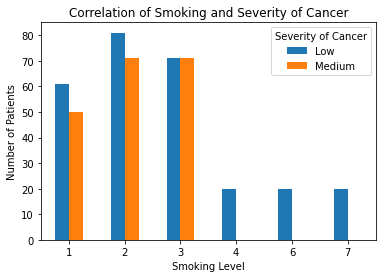

In [391]:
ct1.plot(kind='bar')
plt.xlabel("Smoking Level")
plt.ylabel("Number of Patients")
plt.title("Correlation of Smoking and Severity of Cancer")

plt.legend(title="Severity of Cancer")
plt.xticks(rotation=0)
plt.show()

In [392]:
tstat, pval, dof, efreq = stats.chi2_contingency(ct1)
print(pval)

2.0884732820904753e-09


In [ ]:
df.groupby(['smoking', 'air_pollution', 'severity_of_cancer']).size().unstack().fillna(0)

severity_of_cancer      High   Low  Medium
smoking air_pollution                     
1       2                0.0  10.0    50.0
        3                0.0  41.0     0.0
        4                0.0  10.0     0.0
        6                0.0   0.0    70.0
2       1                0.0  20.0     0.0
        2                0.0  20.0    10.0
        3                0.0  21.0    61.0
        4               50.0  10.0     0.0
        5                0.0  10.0     0.0
        6               20.0   0.0     0.0
3       1                0.0  10.0   101.0
        2                0.0  41.0     0.0
        3                0.0  20.0     0.0
4       2                0.0  20.0     0.0
        3                0.0  10.0     0.0
        6               19.0  10.0     0.0
5       2                0.0   0.0    10.0
6       1                0.0  10.0     0.0
        2               10.0  10.0     0.0
        3                0.0  10.0     0.0
        4                0.0   0.0    20.0
7       2               10.0  10.0     0.0
        3                0.0  10.0     0.0
        6              147.0   0.0     0.0
        7               30.0   0.0     0.0
8       5                0.0   0.0    10.0
        6               60.0   0.0     0.0
        8               19.0   0.0     0.0

<AxesSubplot:ylabel='passive_smoker'>

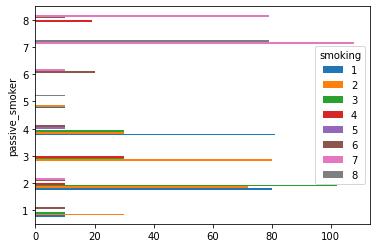

In [373]:
ct = pd.crosstab(df['passive_smoker'], df['smoking'])
ct.plot(kind='barh')